In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from math import inf
from optical_flow import *
from tqdm import tqdm
from tracking_utils import *
import matplotlib.animation as animation
seq_path = '../datasets/results_opticalflow_kitti/'

In [2]:
past_img = cv2.imread(seq_path + '000045_10.png')
current_img = cv2.imread(seq_path + '000045_11.png')

optical_flow_path = seq_path +'gt_000045_10_noc.png'
gt_flow = load_flow(optical_flow_path)

In [5]:
optical_flow = block_matching(current_img, past_img, 'forward', 'ncc', 31, 4, 1)

100%|██████████| 13/13 [00:02<00:00,  5.84it/s]


In [7]:
#Grid search
methods = ['backward', 'forward']
metrics = ['ssd', 'sad', 'ncc']
block_sizes = [8, 16, 32, 64, 128]
area_pad = [8, 16, 32, 64]
stride = [1, 2]
all_results = {}
for method in methods:
    all_results[method] = {}
    for metric in metrics:
        all_results[method][metric] = []
        for block_size in block_sizes:
            for pad in area_pad:
                for strd in stride:
                    optical_flow = block_matching(current_img, past_img, method, metric, block_size, pad, strd)
                    error_msne = flow_msen(gt_flow, optical_flow)
                    error_pepn = flow_pepn(gt_flow, optical_flow)
                    print(f'{method} - {metric}: [{block_size}, {pad}, {strd}]','MSNE: ', error_msne, 'PEPN:', error_pepn)
                    all_results[method][metric].append([block_size, pad, strd, error_msne, error_pepn])

100%|██████████| 47/47 [00:26<00:00,  1.76it/s]


backward - ssd: [8, 8, 1] MSNE:  9.565793128892762 PEPN: 65.98677274034314


100%|██████████| 47/47 [00:07<00:00,  6.70it/s]


backward - ssd: [8, 8, 2] MSNE:  9.895240992420135 PEPN: 68.67631553723761


100%|██████████| 47/47 [01:44<00:00,  2.22s/it]


backward - ssd: [8, 16, 1] MSNE:  9.93206353152782 PEPN: 64.01322725965686


100%|██████████| 47/47 [00:26<00:00,  1.78it/s]


backward - ssd: [8, 16, 2] MSNE:  10.504010904876523 PEPN: 68.82871657241445


100%|██████████| 47/47 [06:40<00:00,  8.52s/it]


backward - ssd: [8, 32, 1] MSNE:  13.354955891146354 PEPN: 65.30719831304515


100%|██████████| 47/47 [01:41<00:00,  2.16s/it]


backward - ssd: [8, 32, 2] MSNE:  14.674729976286494 PEPN: 71.11281510591392


100%|██████████| 47/47 [25:00<00:00, 31.92s/it]


backward - ssd: [8, 64, 1] MSNE:  21.93394783668579 PEPN: 68.35138502827566


100%|██████████| 47/47 [06:16<00:00,  8.02s/it]


backward - ssd: [8, 64, 2] MSNE:  24.756444390545457 PEPN: 74.5528611137736


100%|██████████| 24/24 [00:07<00:00,  3.10it/s]


backward - ssd: [16, 8, 1] MSNE:  8.279952719333533 PEPN: 53.716093165915844


100%|██████████| 24/24 [00:02<00:00, 11.93it/s]


backward - ssd: [16, 8, 2] MSNE:  8.645459604082347 PEPN: 57.52611904533691


100%|██████████| 24/24 [00:30<00:00,  1.29s/it]


backward - ssd: [16, 16, 1] MSNE:  7.916807791714373 PEPN: 49.75462474839452


100%|██████████| 24/24 [00:07<00:00,  3.10it/s]


backward - ssd: [16, 16, 2] MSNE:  8.743040486527542 PEPN: 54.66979775711684


100%|██████████| 24/24 [01:58<00:00,  4.95s/it]


backward - ssd: [16, 32, 1] MSNE:  10.476813428386649 PEPN: 48.50186906929934


100%|██████████| 24/24 [00:30<00:00,  1.26s/it]


backward - ssd: [16, 32, 2] MSNE:  11.395488633082074 PEPN: 54.19246621297805


100%|██████████| 24/24 [07:25<00:00, 18.58s/it]


backward - ssd: [16, 64, 1] MSNE:  16.042834246166827 PEPN: 50.522380906738235


100%|██████████| 24/24 [01:52<00:00,  4.69s/it]


backward - ssd: [16, 64, 2] MSNE:  18.269940285536276 PEPN: 56.23118949487204


100%|██████████| 12/12 [00:02<00:00,  4.44it/s]


backward - ssd: [32, 8, 1] MSNE:  7.174040594137426 PEPN: 46.92993386370171


100%|██████████| 12/12 [00:00<00:00, 17.02it/s]


backward - ssd: [32, 8, 2] MSNE:  7.3601864269042485 PEPN: 45.94843285727978


100%|██████████| 12/12 [00:10<00:00,  1.10it/s]


backward - ssd: [32, 16, 1] MSNE:  7.801234111993236 PEPN: 45.27173392121154


100%|██████████| 12/12 [00:02<00:00,  4.28it/s]


backward - ssd: [32, 16, 2] MSNE:  8.07847817732854 PEPN: 46.31170324930509


100%|██████████| 12/12 [00:42<00:00,  3.55s/it]


backward - ssd: [32, 32, 1] MSNE:  9.718333788968996 PEPN: 41.260423655707854


100%|██████████| 12/12 [00:10<00:00,  1.11it/s]


backward - ssd: [32, 32, 2] MSNE:  10.340255775969682 PEPN: 44.20971916035656


100%|██████████| 12/12 [02:42<00:00, 13.54s/it]


backward - ssd: [32, 64, 1] MSNE:  14.50823516154743 PEPN: 40.96712355027317


100%|██████████| 12/12 [00:41<00:00,  3.42s/it]


backward - ssd: [32, 64, 2] MSNE:  15.415830631603068 PEPN: 43.328860346975944


100%|██████████| 6/6 [00:01<00:00,  4.82it/s]


backward - ssd: [64, 8, 1] MSNE:  8.251094024342654 PEPN: 55.33307773411291


100%|██████████| 6/6 [00:00<00:00, 18.49it/s]


backward - ssd: [64, 8, 2] MSNE:  8.320446418688512 PEPN: 57.11108981117608


100%|██████████| 6/6 [00:05<00:00,  1.19it/s]


backward - ssd: [64, 16, 1] MSNE:  9.555118219770982 PEPN: 51.058180772548646


100%|██████████| 6/6 [00:01<00:00,  4.64it/s]


backward - ssd: [64, 16, 2] MSNE:  9.796512555698383 PEPN: 51.58152017636346


100%|██████████| 6/6 [00:20<00:00,  3.36s/it]


backward - ssd: [64, 32, 1] MSNE:  10.67518982147874 PEPN: 46.02032013802358


100%|██████████| 6/6 [00:05<00:00,  1.20it/s]


backward - ssd: [64, 32, 2] MSNE:  11.281141724998117 PEPN: 45.32445126042366


100%|██████████| 6/6 [01:18<00:00, 13.07s/it]


backward - ssd: [64, 64, 1] MSNE:  14.277792144882477 PEPN: 45.79219783379661


100%|██████████| 6/6 [00:19<00:00,  3.32s/it]


backward - ssd: [64, 64, 2] MSNE:  16.371259351897265 PEPN: 44.826032780600016


100%|██████████| 3/3 [00:00<00:00,  5.26it/s]


backward - ssd: [128, 8, 1] MSNE:  9.349593854280668 PEPN: 63.45825745231477


100%|██████████| 3/3 [00:00<00:00, 19.30it/s]

backward - ssd: [128, 8, 2] MSNE:  9.480027506950439 PEPN: 64.9947282660788



100%|██████████| 3/3 [00:02<00:00,  1.16it/s]


backward - ssd: [128, 16, 1] MSNE:  13.312148281018578 PEPN: 65.72510303843573


100%|██████████| 3/3 [00:00<00:00,  4.51it/s]


backward - ssd: [128, 16, 2] MSNE:  14.04008691460142 PEPN: 65.67909517875971


100%|██████████| 3/3 [00:10<00:00,  3.59s/it]


backward - ssd: [128, 32, 1] MSNE:  15.066350026467981 PEPN: 65.72510303843573


100%|██████████| 3/3 [00:03<00:00,  1.04s/it]


backward - ssd: [128, 32, 2] MSNE:  15.876066161798697 PEPN: 65.67909517875971


100%|██████████| 3/3 [00:45<00:00, 15.14s/it]


backward - ssd: [128, 64, 1] MSNE:  22.001117362302846 PEPN: 65.72510303843573


100%|██████████| 3/3 [00:11<00:00,  3.79s/it]


backward - ssd: [128, 64, 2] MSNE:  22.619031342003804 PEPN: 65.67909517875971


100%|██████████| 47/47 [00:25<00:00,  1.84it/s]


backward - sad: [8, 8, 1] MSNE:  13.128524551789276 PEPN: 95.69059714367872


100%|██████████| 47/47 [00:06<00:00,  7.07it/s]


backward - sad: [8, 8, 2] MSNE:  13.15563729339698 PEPN: 95.56886801495256


100%|██████████| 47/47 [01:39<00:00,  2.13s/it]


backward - sad: [8, 16, 1] MSNE:  17.61868326936221 PEPN: 98.83734304610371


100%|██████████| 47/47 [00:25<00:00,  1.86it/s]


backward - sad: [8, 16, 2] MSNE:  17.455043938105987 PEPN: 98.39260040256877


100%|██████████| 47/47 [06:20<00:00,  8.09s/it]


backward - sad: [8, 32, 1] MSNE:  28.395523632898357 PEPN: 99.6779449822678


100%|██████████| 47/47 [01:35<00:00,  2.04s/it]


backward - sad: [8, 32, 2] MSNE:  28.507947519670793 PEPN: 99.53896290616314


100%|██████████| 47/47 [23:46<00:00, 30.34s/it]


backward - sad: [8, 64, 1] MSNE:  49.03634895994095 PEPN: 99.77858717530911


100%|██████████| 47/47 [05:59<00:00,  7.64s/it]


backward - sad: [8, 64, 2] MSNE:  49.294675025420524 PEPN: 99.70957538579508


100%|██████████| 24/24 [00:07<00:00,  3.31it/s]


backward - sad: [16, 8, 1] MSNE:  13.827488558667246 PEPN: 97.48969615642672


100%|██████████| 24/24 [00:01<00:00, 12.69it/s]


backward - sad: [16, 8, 2] MSNE:  13.623934309087169 PEPN: 96.8360011501965


100%|██████████| 24/24 [00:28<00:00,  1.20s/it]


backward - sad: [16, 16, 1] MSNE:  18.885937647503354 PEPN: 99.45940764880667


100%|██████████| 24/24 [00:07<00:00,  3.31it/s]


backward - sad: [16, 16, 2] MSNE:  18.498917513261265 PEPN: 99.02424997603757


100%|██████████| 24/24 [01:51<00:00,  4.63s/it]


backward - sad: [16, 32, 1] MSNE:  30.600226168832812 PEPN: 99.82363653790856


100%|██████████| 24/24 [00:28<00:00,  1.19s/it]


backward - sad: [16, 32, 2] MSNE:  30.343865645341594 PEPN: 99.71532636825458


100%|██████████| 24/24 [06:59<00:00, 17.49s/it]


backward - sad: [16, 64, 1] MSNE:  53.40459411003413 PEPN: 99.93961468417521


100%|██████████| 24/24 [01:46<00:00,  4.43s/it]


backward - sad: [16, 64, 2] MSNE:  53.64879146494238 PEPN: 99.93386370171571


100%|██████████| 12/12 [00:02<00:00,  4.85it/s]


backward - sad: [32, 8, 1] MSNE:  14.200681229629069 PEPN: 99.1306431515384


100%|██████████| 12/12 [00:00<00:00, 18.79it/s]


backward - sad: [32, 8, 2] MSNE:  13.933814086356751 PEPN: 98.1165532445126


100%|██████████| 12/12 [00:09<00:00,  1.20it/s]


backward - sad: [32, 16, 1] MSNE:  20.59532185099022 PEPN: 99.95495063740056


100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


backward - sad: [32, 16, 2] MSNE:  20.342867895615107 PEPN: 99.93194670756255


100%|██████████| 12/12 [00:39<00:00,  3.28s/it]


backward - sad: [32, 32, 1] MSNE:  33.71729236643747 PEPN: 100.0


100%|██████████| 12/12 [00:09<00:00,  1.21it/s]


backward - sad: [32, 32, 2] MSNE:  33.675128818379754 PEPN: 99.97699607016199


100%|██████████| 12/12 [02:27<00:00, 12.30s/it]


backward - sad: [32, 64, 1] MSNE:  59.587095205889746 PEPN: 100.0


100%|██████████| 12/12 [00:37<00:00,  3.11s/it]


backward - sad: [32, 64, 2] MSNE:  59.101620635871626 PEPN: 99.97699607016199


100%|██████████| 6/6 [00:01<00:00,  5.65it/s]


backward - sad: [64, 8, 1] MSNE:  14.424875863650053 PEPN: 99.66356752611904


100%|██████████| 6/6 [00:00<00:00, 21.69it/s]


backward - sad: [64, 8, 2] MSNE:  13.965478188621626 PEPN: 99.06163136202434


100%|██████████| 6/6 [00:04<00:00,  1.39it/s]


backward - sad: [64, 16, 1] MSNE:  21.478783600780403 PEPN: 99.99904150292342


100%|██████████| 6/6 [00:01<00:00,  5.37it/s]


backward - sad: [64, 16, 2] MSNE:  21.26055026747577 PEPN: 100.0


100%|██████████| 6/6 [00:17<00:00,  2.94s/it]


backward - sad: [64, 32, 1] MSNE:  36.48844665528391 PEPN: 100.0


100%|██████████| 6/6 [00:04<00:00,  1.36it/s]


backward - sad: [64, 32, 2] MSNE:  36.21843279313444 PEPN: 100.0


100%|██████████| 6/6 [01:09<00:00, 11.62s/it]


backward - sad: [64, 64, 1] MSNE:  65.85645774215006 PEPN: 100.0


100%|██████████| 6/6 [00:17<00:00,  2.93s/it]


backward - sad: [64, 64, 2] MSNE:  65.93428513964908 PEPN: 100.0


100%|██████████| 3/3 [00:00<00:00,  6.09it/s]


backward - sad: [128, 8, 1] MSNE:  12.764982977295599 PEPN: 95.40688200900988


100%|██████████| 3/3 [00:00<00:00, 23.12it/s]


backward - sad: [128, 8, 2] MSNE:  12.737465371134833 PEPN: 95.40688200900988


100%|██████████| 3/3 [00:02<00:00,  1.34it/s]


backward - sad: [128, 16, 1] MSNE:  22.664886323695573 PEPN: 100.0


100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


backward - sad: [128, 16, 2] MSNE:  23.126290704051307 PEPN: 100.0


100%|██████████| 3/3 [00:09<00:00,  3.14s/it]


backward - sad: [128, 32, 1] MSNE:  43.237938909253664 PEPN: 100.0


100%|██████████| 3/3 [00:02<00:00,  1.27it/s]


backward - sad: [128, 32, 2] MSNE:  43.352037155252276 PEPN: 100.0


100%|██████████| 3/3 [00:38<00:00, 12.72s/it]


backward - sad: [128, 64, 1] MSNE:  75.91671827115276 PEPN: 100.0


100%|██████████| 3/3 [00:09<00:00,  3.26s/it]


backward - sad: [128, 64, 2] MSNE:  75.41562927540922 PEPN: 100.0


100%|██████████| 47/47 [01:19<00:00,  1.70s/it]


backward - ncc: [8, 8, 1] MSNE:  8.59756636553149 PEPN: 50.51758842135531


100%|██████████| 47/47 [00:19<00:00,  2.36it/s]


backward - ncc: [8, 8, 2] MSNE:  9.560508484398827 PEPN: 58.845969519792966


100%|██████████| 47/47 [05:09<00:00,  6.59s/it]


backward - ncc: [8, 16, 1] MSNE:  8.069090425988175 PEPN: 44.58353302022429


100%|██████████| 47/47 [01:18<00:00,  1.67s/it]


backward - ncc: [8, 16, 2] MSNE:  9.592368565178612 PEPN: 54.46563787980447


100%|██████████| 47/47 [19:51<00:00, 25.35s/it]


backward - ncc: [8, 32, 1] MSNE:  9.91536859366167 PEPN: 44.04006517780121


100%|██████████| 47/47 [05:00<00:00,  6.39s/it]


backward - ncc: [8, 32, 2] MSNE:  12.686303526988317 PEPN: 55.54586408511454


100%|██████████| 47/47 [1:13:25<00:00, 93.73s/it] 


backward - ncc: [8, 64, 1] MSNE:  17.54096985150981 PEPN: 48.17885555449056


100%|██████████| 47/47 [18:15<00:00, 23.31s/it]


backward - ncc: [8, 64, 2] MSNE:  21.980611120710602 PEPN: 59.766126713313525


100%|██████████| 24/24 [00:22<00:00,  1.08it/s]


backward - ncc: [16, 8, 1] MSNE:  7.3012133761050215 PEPN: 38.43381577686188


100%|██████████| 24/24 [00:05<00:00,  4.25it/s]


backward - ncc: [16, 8, 2] MSNE:  8.076381588873959 PEPN: 45.316783283810985


100%|██████████| 24/24 [01:28<00:00,  3.67s/it]


backward - ncc: [16, 16, 1] MSNE:  5.752237340205532 PEPN: 29.06067286494776


100%|██████████| 24/24 [00:22<00:00,  1.09it/s]


backward - ncc: [16, 16, 2] MSNE:  7.288084681406242 PEPN: 38.89485287069874


100%|██████████| 24/24 [05:42<00:00, 14.26s/it]


backward - ncc: [16, 32, 1] MSNE:  5.265208258908779 PEPN: 23.920253043228218


100%|██████████| 24/24 [01:26<00:00,  3.60s/it]


backward - ncc: [16, 32, 2] MSNE:  8.211987591153859 PEPN: 35.195054155084826


100%|██████████| 24/24 [21:38<00:00, 54.11s/it]


backward - ncc: [16, 64, 1] MSNE:  8.965998818395816 PEPN: 27.05070449535129


100%|██████████| 24/24 [05:24<00:00, 13.50s/it]


backward - ncc: [16, 64, 2] MSNE:  13.044489996010212 PEPN: 37.11300680532924


100%|██████████| 12/12 [00:07<00:00,  1.53it/s]


backward - ncc: [32, 8, 1] MSNE:  6.7848503633245265 PEPN: 38.987827087127386


100%|██████████| 12/12 [00:02<00:00,  5.97it/s]


backward - ncc: [32, 8, 2] MSNE:  7.3022673778033145 PEPN: 41.939039585929265


100%|██████████| 12/12 [00:31<00:00,  2.66s/it]


backward - ncc: [32, 16, 1] MSNE:  5.8339417271160645 PEPN: 28.67152305185469


100%|██████████| 12/12 [00:08<00:00,  1.49it/s]


backward - ncc: [32, 16, 2] MSNE:  6.31485035127102 PEPN: 31.773219591680245


100%|██████████| 12/12 [02:06<00:00, 10.54s/it]


backward - ncc: [32, 32, 1] MSNE:  4.771189002839249 PEPN: 19.80159110514713


100%|██████████| 12/12 [00:31<00:00,  2.66s/it]


backward - ncc: [32, 32, 2] MSNE:  5.526022367207093 PEPN: 24.274896961564266


100%|██████████| 12/12 [07:57<00:00, 39.82s/it]


backward - ncc: [32, 64, 1] MSNE:  8.013266621687617 PEPN: 20.352726924182882


100%|██████████| 12/12 [02:01<00:00, 10.14s/it]


backward - ncc: [32, 64, 2] MSNE:  8.88328431110975 PEPN: 25.23722802645452


100%|██████████| 6/6 [00:03<00:00,  1.75it/s]


backward - ncc: [64, 8, 1] MSNE:  7.621921170312581 PEPN: 47.49640563596281


100%|██████████| 6/6 [00:00<00:00,  6.85it/s]


backward - ncc: [64, 8, 2] MSNE:  7.859488403459305 PEPN: 49.09230326847503


100%|██████████| 6/6 [00:14<00:00,  2.40s/it]


backward - ncc: [64, 16, 1] MSNE:  9.137723041883056 PEPN: 41.278635100162944


100%|██████████| 6/6 [00:03<00:00,  1.67it/s]


backward - ncc: [64, 16, 2] MSNE:  9.153727142380795 PEPN: 42.37515575577495


100%|██████████| 6/6 [00:57<00:00,  9.59s/it]


backward - ncc: [64, 32, 1] MSNE:  9.62003278631563 PEPN: 35.25927345921595


100%|██████████| 6/6 [00:14<00:00,  2.43s/it]


backward - ncc: [64, 32, 2] MSNE:  10.264964481661476 PEPN: 36.093165915843954


100%|██████████| 6/6 [03:47<00:00, 37.95s/it]


backward - ncc: [64, 64, 1] MSNE:  14.189596538276458 PEPN: 34.965014856704684


100%|██████████| 6/6 [00:56<00:00,  9.49s/it]


backward - ncc: [64, 64, 2] MSNE:  14.052620613240018 PEPN: 35.544905588037956


100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


backward - ncc: [128, 8, 1] MSNE:  9.393518772839698 PEPN: 65.2803603949008


100%|██████████| 3/3 [00:00<00:00,  7.38it/s]


backward - ncc: [128, 8, 2] MSNE:  9.436338089023351 PEPN: 65.42030096808205


100%|██████████| 3/3 [00:07<00:00,  2.45s/it]


backward - ncc: [128, 16, 1] MSNE:  14.168660645423566 PEPN: 70.81280552094316


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


backward - ncc: [128, 16, 2] MSNE:  14.875068053859453 PEPN: 70.01533595322535


100%|██████████| 3/3 [00:30<00:00, 10.27s/it]


backward - ncc: [128, 32, 1] MSNE:  15.748640516911678 PEPN: 70.88277580753379


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]


backward - ncc: [128, 32, 2] MSNE:  16.102054404312934 PEPN: 70.3814818364804


100%|██████████| 3/3 [02:08<00:00, 42.82s/it]


backward - ncc: [128, 64, 1] MSNE:  19.421625024511798 PEPN: 70.88277580753379


100%|██████████| 3/3 [00:32<00:00, 10.78s/it]


backward - ncc: [128, 64, 2] MSNE:  19.722524634468382 PEPN: 70.3814818364804


100%|██████████| 47/47 [00:26<00:00,  1.77it/s]


forward - ssd: [8, 8, 1] MSNE:  9.084228007599277 PEPN: 62.31285344579699


100%|██████████| 47/47 [00:06<00:00,  6.83it/s]


forward - ssd: [8, 8, 2] MSNE:  9.616839436323541 PEPN: 68.95427968944695


100%|██████████| 47/47 [01:43<00:00,  2.21s/it]


forward - ssd: [8, 16, 1] MSNE:  9.448035506460545 PEPN: 60.87127384261478


100%|██████████| 47/47 [00:26<00:00,  1.79it/s]


forward - ssd: [8, 16, 2] MSNE:  10.298584939907649 PEPN: 67.48969615642672


100%|██████████| 47/47 [06:45<00:00,  8.63s/it]


forward - ssd: [8, 32, 1] MSNE:  13.336430378249872 PEPN: 62.66462187290329


100%|██████████| 47/47 [01:41<00:00,  2.16s/it]


forward - ssd: [8, 32, 2] MSNE:  14.797959537496816 PEPN: 70.38627432186331


100%|██████████| 47/47 [24:46<00:00, 31.63s/it]


forward - ssd: [8, 64, 1] MSNE:  21.71182406874849 PEPN: 66.47848174063068


100%|██████████| 47/47 [06:12<00:00,  7.93s/it]


forward - ssd: [8, 64, 2] MSNE:  24.49086770662968 PEPN: 74.16658679191029


100%|██████████| 24/24 [00:07<00:00,  3.14it/s]


forward - ssd: [16, 8, 1] MSNE:  7.680233561459987 PEPN: 50.211827853925044


100%|██████████| 24/24 [00:01<00:00, 12.07it/s]


forward - ssd: [16, 8, 2] MSNE:  8.200007737708672 PEPN: 55.279401897824215


100%|██████████| 24/24 [00:30<00:00,  1.26s/it]


forward - ssd: [16, 16, 1] MSNE:  7.440057299830116 PEPN: 46.239815968561295


100%|██████████| 24/24 [00:07<00:00,  3.14it/s]


forward - ssd: [16, 16, 2] MSNE:  8.098195381589639 PEPN: 50.337390970957536


100%|██████████| 24/24 [01:57<00:00,  4.88s/it]


forward - ssd: [16, 32, 1] MSNE:  9.520145283015529 PEPN: 45.32636825457682


100%|██████████| 24/24 [00:29<00:00,  1.23s/it]


forward - ssd: [16, 32, 2] MSNE:  10.303462365096777 PEPN: 49.79488162561104


100%|██████████| 24/24 [07:19<00:00, 18.32s/it]


forward - ssd: [16, 64, 1] MSNE:  13.662137960804868 PEPN: 46.465062781558515


100%|██████████| 24/24 [01:52<00:00,  4.70s/it]


forward - ssd: [16, 64, 2] MSNE:  15.790032289500976 PEPN: 52.695293779353975


100%|██████████| 12/12 [00:02<00:00,  4.38it/s]


forward - ssd: [32, 8, 1] MSNE:  7.198734287606186 PEPN: 47.86255151921787


100%|██████████| 12/12 [00:00<00:00, 17.10it/s]


forward - ssd: [32, 8, 2] MSNE:  7.353276908474919 PEPN: 48.62839068340841


100%|██████████| 12/12 [00:11<00:00,  1.09it/s]


forward - ssd: [32, 16, 1] MSNE:  6.0985963935001655 PEPN: 39.50829099971245


100%|██████████| 12/12 [00:02<00:00,  4.29it/s]


forward - ssd: [32, 16, 2] MSNE:  6.735458960031727 PEPN: 41.9725869836097


100%|██████████| 12/12 [00:47<00:00,  3.97s/it]


forward - ssd: [32, 32, 1] MSNE:  7.167644716919505 PEPN: 35.18067669893607


100%|██████████| 12/12 [00:17<00:00,  1.43s/it]


forward - ssd: [32, 32, 2] MSNE:  7.655866488416631 PEPN: 38.15393463049938


100%|██████████| 12/12 [03:36<00:00, 18.04s/it]


forward - ssd: [32, 64, 1] MSNE:  9.613128472221272 PEPN: 35.47781079267708


100%|██████████| 12/12 [00:52<00:00,  4.39s/it]


forward - ssd: [32, 64, 2] MSNE:  10.352655548007474 PEPN: 38.95619668360011


100%|██████████| 6/6 [00:01<00:00,  3.60it/s]


forward - ssd: [64, 8, 1] MSNE:  7.682097616178693 PEPN: 52.55247771494297


100%|██████████| 6/6 [00:00<00:00,  9.87it/s]


forward - ssd: [64, 8, 2] MSNE:  7.684021355308297 PEPN: 51.27192562062686


100%|██████████| 6/6 [00:07<00:00,  1.22s/it]


forward - ssd: [64, 16, 1] MSNE:  6.256731067440991 PEPN: 43.89820761046679


100%|██████████| 6/6 [00:01<00:00,  3.13it/s]


forward - ssd: [64, 16, 2] MSNE:  6.47917996987975 PEPN: 45.78357136010735


100%|██████████| 6/6 [00:26<00:00,  4.39s/it]


forward - ssd: [64, 32, 1] MSNE:  6.145757403232278 PEPN: 37.43697881721461


100%|██████████| 6/6 [00:06<00:00,  1.13s/it]


forward - ssd: [64, 32, 2] MSNE:  6.263089390354711 PEPN: 38.60059426818748


100%|██████████| 6/6 [01:42<00:00, 17.01s/it]


forward - ssd: [64, 64, 1] MSNE:  8.981627904576108 PEPN: 36.89926195725103


100%|██████████| 6/6 [00:25<00:00,  4.30s/it]


forward - ssd: [64, 64, 2] MSNE:  9.398021496148646 PEPN: 38.89868685900508


100%|██████████| 3/3 [00:00<00:00,  4.69it/s]


forward - ssd: [128, 8, 1] MSNE:  9.09603479167642 PEPN: 63.45825745231477


100%|██████████| 3/3 [00:00<00:00, 16.50it/s]


forward - ssd: [128, 8, 2] MSNE:  9.132100740979698 PEPN: 63.412249592638744


100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


forward - ssd: [128, 16, 1] MSNE:  7.751885767962556 PEPN: 61.98408894852871


100%|██████████| 3/3 [00:00<00:00,  3.87it/s]


forward - ssd: [128, 16, 2] MSNE:  7.9882921639320275 PEPN: 63.66912680916323


100%|██████████| 3/3 [00:13<00:00,  4.48s/it]


forward - ssd: [128, 32, 1] MSNE:  8.187819706550131 PEPN: 58.95044570114061


100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


forward - ssd: [128, 32, 2] MSNE:  9.084161980044751 PEPN: 61.524010351768425


100%|██████████| 3/3 [01:00<00:00, 20.12s/it]


forward - ssd: [128, 64, 1] MSNE:  9.878053340969824 PEPN: 58.68110802262053


100%|██████████| 3/3 [00:15<00:00,  5.30s/it]


forward - ssd: [128, 64, 2] MSNE:  9.102147924828838 PEPN: 61.24796319371226


100%|██████████| 47/47 [00:36<00:00,  1.29it/s]


forward - sad: [8, 8, 1] MSNE:  11.972665494043454 PEPN: 82.18920732291767


100%|██████████| 47/47 [00:07<00:00,  5.89it/s]


forward - sad: [8, 8, 2] MSNE:  12.102223360516588 PEPN: 84.61324642959839


100%|██████████| 47/47 [02:37<00:00,  3.35s/it]


forward - sad: [8, 16, 1] MSNE:  15.676129171664321 PEPN: 88.58525831496213


100%|██████████| 47/47 [00:40<00:00,  1.17it/s]


forward - sad: [8, 16, 2] MSNE:  15.907843335707843 PEPN: 89.89456532157577


100%|██████████| 47/47 [07:51<00:00, 10.03s/it]


forward - sad: [8, 32, 1] MSNE:  24.11254589791741 PEPN: 91.88440525256398


100%|██████████| 47/47 [01:37<00:00,  2.07s/it]


forward - sad: [8, 32, 2] MSNE:  24.684453946150615 PEPN: 93.18508578548835


100%|██████████| 47/47 [23:59<00:00, 30.63s/it]


forward - sad: [8, 64, 1] MSNE:  39.30425148665719 PEPN: 93.82919582095275


100%|██████████| 47/47 [06:02<00:00,  7.72s/it]


forward - sad: [8, 64, 2] MSNE:  40.32190039224948 PEPN: 94.60749544713889


100%|██████████| 24/24 [00:07<00:00,  3.27it/s]


forward - sad: [16, 8, 1] MSNE:  11.450314927978214 PEPN: 69.33096904054443


100%|██████████| 24/24 [00:01<00:00, 12.51it/s]


forward - sad: [16, 8, 2] MSNE:  11.855119584289087 PEPN: 74.18671523051854


100%|██████████| 24/24 [00:29<00:00,  1.21s/it]


forward - sad: [16, 16, 1] MSNE:  15.853996199327067 PEPN: 80.35272692418287


100%|██████████| 24/24 [00:07<00:00,  3.23it/s]


forward - sad: [16, 16, 2] MSNE:  16.063781453434338 PEPN: 82.85632128822007


100%|██████████| 24/24 [01:52<00:00,  4.68s/it]


forward - sad: [16, 32, 1] MSNE:  26.043077614071848 PEPN: 87.63730470622065


100%|██████████| 24/24 [00:28<00:00,  1.17s/it]


forward - sad: [16, 32, 2] MSNE:  26.552263040625625 PEPN: 88.86034697594172


100%|██████████| 24/24 [06:59<00:00, 17.47s/it]


forward - sad: [16, 64, 1] MSNE:  41.982897426621435 PEPN: 91.15211348605386


100%|██████████| 24/24 [01:46<00:00,  4.46s/it]


forward - sad: [16, 64, 2] MSNE:  42.36313908519617 PEPN: 91.2575481644781


100%|██████████| 12/12 [00:02<00:00,  4.71it/s]


forward - sad: [32, 8, 1] MSNE:  10.325033854765946 PEPN: 58.50762005175884


100%|██████████| 12/12 [00:00<00:00, 18.42it/s]


forward - sad: [32, 8, 2] MSNE:  10.860726594528442 PEPN: 63.99501581520176


100%|██████████| 12/12 [00:09<00:00,  1.22it/s]


forward - sad: [32, 16, 1] MSNE:  14.49090166412507 PEPN: 67.96223521518259


100%|██████████| 12/12 [00:02<00:00,  4.51it/s]


forward - sad: [32, 16, 2] MSNE:  15.22732147583725 PEPN: 73.18125179718201


100%|██████████| 12/12 [00:39<00:00,  3.29s/it]


forward - sad: [32, 32, 1] MSNE:  24.427746342137493 PEPN: 75.11454040065178


100%|██████████| 12/12 [00:09<00:00,  1.21it/s]


forward - sad: [32, 32, 2] MSNE:  25.147457858426414 PEPN: 79.34918048499952


100%|██████████| 12/12 [02:26<00:00, 12.24s/it]


forward - sad: [32, 64, 1] MSNE:  40.66387550100397 PEPN: 80.8521039010831


100%|██████████| 12/12 [00:37<00:00,  3.11s/it]


forward - sad: [32, 64, 2] MSNE:  42.68224676640364 PEPN: 85.1250838684942


100%|██████████| 6/6 [00:01<00:00,  5.50it/s]


forward - sad: [64, 8, 1] MSNE:  9.354671747242719 PEPN: 57.11108981117608


100%|██████████| 6/6 [00:00<00:00, 20.14it/s]


forward - sad: [64, 8, 2] MSNE:  9.146511084298727 PEPN: 53.408415604332404


100%|██████████| 6/6 [00:04<00:00,  1.40it/s]


forward - sad: [64, 16, 1] MSNE:  12.207569244732037 PEPN: 59.399022332981886


100%|██████████| 6/6 [00:01<00:00,  5.42it/s]


forward - sad: [64, 16, 2] MSNE:  12.015162470429667 PEPN: 56.92705837247196


100%|██████████| 6/6 [00:17<00:00,  2.89s/it]


forward - sad: [64, 32, 1] MSNE:  18.787036906188717 PEPN: 58.2775807533787


100%|██████████| 6/6 [00:04<00:00,  1.37it/s]


forward - sad: [64, 32, 2] MSNE:  18.422106156623325 PEPN: 55.98581424326656


100%|██████████| 6/6 [01:07<00:00, 11.32s/it]


forward - sad: [64, 64, 1] MSNE:  35.62917015151705 PEPN: 68.71465542030097


100%|██████████| 6/6 [00:17<00:00,  2.86s/it]


forward - sad: [64, 64, 2] MSNE:  35.49669697289089 PEPN: 65.79890731333269


100%|██████████| 3/3 [00:00<00:00,  6.03it/s]


forward - sad: [128, 8, 1] MSNE:  9.069583901010594 PEPN: 63.91162656953896


100%|██████████| 3/3 [00:00<00:00, 21.86it/s]


forward - sad: [128, 8, 2] MSNE:  9.185622419406789 PEPN: 65.51998466404677


100%|██████████| 3/3 [00:02<00:00,  1.32it/s]


forward - sad: [128, 16, 1] MSNE:  9.802743526164134 PEPN: 61.440621106105624


100%|██████████| 3/3 [00:00<00:00,  5.21it/s]


forward - sad: [128, 16, 2] MSNE:  9.913281223559999 PEPN: 64.37362216045241


100%|██████████| 3/3 [00:09<00:00,  3.12s/it]


forward - sad: [128, 32, 1] MSNE:  13.785571343380795 PEPN: 60.175404965014856


100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


forward - sad: [128, 32, 2] MSNE:  13.964098368884374 PEPN: 62.755679095178756


100%|██████████| 3/3 [00:38<00:00, 12.81s/it]


forward - sad: [128, 64, 1] MSNE:  24.459811807949592 PEPN: 62.22658870890444


100%|██████████| 3/3 [00:09<00:00,  3.28s/it]


forward - sad: [128, 64, 2] MSNE:  25.23224955853503 PEPN: 65.02540017252947


100%|██████████| 47/47 [01:18<00:00,  1.67s/it]


forward - ncc: [8, 8, 1] MSNE:  8.34067470394833 PEPN: 48.09546630882776


100%|██████████| 47/47 [00:19<00:00,  2.37it/s]


forward - ncc: [8, 8, 2] MSNE:  9.229777544619447 PEPN: 57.60663279976996


100%|██████████| 47/47 [05:06<00:00,  6.52s/it]


forward - ncc: [8, 16, 1] MSNE:  7.495759204541617 PEPN: 42.835234352535224


100%|██████████| 47/47 [01:18<00:00,  1.66s/it]


forward - ncc: [8, 16, 2] MSNE:  8.841898994652567 PEPN: 53.9097095753858


100%|██████████| 47/47 [19:47<00:00, 25.26s/it]


forward - ncc: [8, 32, 1] MSNE:  8.57655793397909 PEPN: 43.46880092015719


100%|██████████| 47/47 [04:57<00:00,  6.33s/it]


forward - ncc: [8, 32, 2] MSNE:  11.546597077731388 PEPN: 56.51107064123455


100%|██████████| 47/47 [1:13:56<00:00, 94.39s/it] 


forward - ncc: [8, 64, 1] MSNE:  15.4539558499858 PEPN: 48.56129588804754


100%|██████████| 47/47 [18:35<00:00, 23.74s/it]


forward - ncc: [8, 64, 2] MSNE:  20.358872892289046 PEPN: 61.64382248634141


100%|██████████| 24/24 [00:22<00:00,  1.08it/s]


forward - ncc: [16, 8, 1] MSNE:  7.160297840012128 PEPN: 37.038244033355696


100%|██████████| 24/24 [00:05<00:00,  4.23it/s]


forward - ncc: [16, 8, 2] MSNE:  7.967284371027855 PEPN: 44.354452218920734


100%|██████████| 24/24 [01:29<00:00,  3.72s/it]


forward - ncc: [16, 16, 1] MSNE:  4.950681588922016 PEPN: 25.975270775424136


100%|██████████| 24/24 [00:22<00:00,  1.07it/s]


forward - ncc: [16, 16, 2] MSNE:  6.02483198066951 PEPN: 33.88766414262437


100%|██████████| 24/24 [05:47<00:00, 14.49s/it]


forward - ncc: [16, 32, 1] MSNE:  3.6110379817582716 PEPN: 21.06968273746765


100%|██████████| 24/24 [01:27<00:00,  3.66s/it]


forward - ncc: [16, 32, 2] MSNE:  5.5581370444769505 PEPN: 30.395859292629158


100%|██████████| 24/24 [21:51<00:00, 54.64s/it]


forward - ncc: [16, 64, 1] MSNE:  5.5745601477537825 PEPN: 24.239432569730663


100%|██████████| 24/24 [05:29<00:00, 13.72s/it]


forward - ncc: [16, 64, 2] MSNE:  9.365370921778723 PEPN: 34.08319754624748


100%|██████████| 12/12 [00:07<00:00,  1.51it/s]


forward - ncc: [32, 8, 1] MSNE:  6.978081589397993 PEPN: 39.534170420780214


100%|██████████| 12/12 [00:02<00:00,  5.94it/s]


forward - ncc: [32, 8, 2] MSNE:  7.418229698089894 PEPN: 42.99530336432474


100%|██████████| 12/12 [00:32<00:00,  2.71s/it]


forward - ncc: [32, 16, 1] MSNE:  4.426045573305169 PEPN: 24.242308060960415


100%|██████████| 12/12 [00:08<00:00,  1.48it/s]


forward - ncc: [32, 16, 2] MSNE:  5.133601865814258 PEPN: 30.186906929933862


100%|██████████| 12/12 [02:09<00:00, 10.75s/it]


forward - ncc: [32, 32, 1] MSNE:  2.5206590464934955 PEPN: 16.0845394421547


100%|██████████| 12/12 [00:32<00:00,  2.71s/it]


forward - ncc: [32, 32, 2] MSNE:  3.832305629660005 PEPN: 24.886418096424805


100%|██████████| 12/12 [08:07<00:00, 40.62s/it]


forward - ncc: [32, 64, 1] MSNE:  3.6448886068118345 PEPN: 17.393846448768333


100%|██████████| 12/12 [02:01<00:00, 10.11s/it]


forward - ncc: [32, 64, 2] MSNE:  6.029601818253528 PEPN: 26.89159398063836


100%|██████████| 6/6 [00:03<00:00,  1.75it/s]


forward - ncc: [64, 8, 1] MSNE:  7.37633321989917 PEPN: 47.60854979392313


100%|██████████| 6/6 [00:00<00:00,  6.82it/s]


forward - ncc: [64, 8, 2] MSNE:  7.665189773826935 PEPN: 48.99070257835714


100%|██████████| 6/6 [00:14<00:00,  2.41s/it]


forward - ncc: [64, 16, 1] MSNE:  4.605795133024523 PEPN: 36.00402568772165


100%|██████████| 6/6 [00:03<00:00,  1.67it/s]


forward - ncc: [64, 16, 2] MSNE:  4.912584615706626 PEPN: 38.72807437937314


100%|██████████| 6/6 [00:59<00:00,  9.85s/it]


forward - ncc: [64, 32, 1] MSNE:  3.9867893565535666 PEPN: 28.894852870698745


100%|██████████| 6/6 [00:14<00:00,  2.49s/it]


forward - ncc: [64, 32, 2] MSNE:  4.4030617235849805 PEPN: 33.01255631170325


100%|██████████| 6/6 [03:53<00:00, 38.95s/it]


forward - ncc: [64, 64, 1] MSNE:  5.7778856415080915 PEPN: 29.528419438320714


100%|██████████| 6/6 [00:57<00:00,  9.65s/it]


forward - ncc: [64, 64, 2] MSNE:  5.941076745332867 PEPN: 33.331735838205695


100%|██████████| 3/3 [00:01<00:00,  1.54it/s]


forward - ncc: [128, 8, 1] MSNE:  9.153365185167555 PEPN: 64.86628965781654


100%|██████████| 3/3 [00:00<00:00,  6.90it/s]


forward - ncc: [128, 8, 2] MSNE:  9.15920977041759 PEPN: 63.99501581520176


100%|██████████| 3/3 [00:07<00:00,  2.66s/it]


forward - ncc: [128, 16, 1] MSNE:  7.482647715848117 PEPN: 67.30470622064603


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


forward - ncc: [128, 16, 2] MSNE:  8.179017224587309 PEPN: 68.55458640851145


100%|██████████| 3/3 [00:33<00:00, 11.28s/it]


forward - ncc: [128, 32, 1] MSNE:  8.613963038794202 PEPN: 65.2391450206077


100%|██████████| 3/3 [00:09<00:00,  3.01s/it]


forward - ncc: [128, 32, 2] MSNE:  9.075677881684832 PEPN: 66.67784913256014


100%|██████████| 3/3 [02:15<00:00, 45.16s/it]


forward - ncc: [128, 64, 1] MSNE:  8.371097485536998 PEPN: 65.28994536566664


100%|██████████| 3/3 [00:34<00:00, 11.41s/it]

forward - ncc: [128, 64, 2] MSNE:  8.8369167394361 PEPN: 66.74686092207419


In [8]:
import json
with open('data.json', 'w') as f:
    json.dump(all_results, f)

MSNE:  8.275228237114506 PEPN: 51.13294354452219


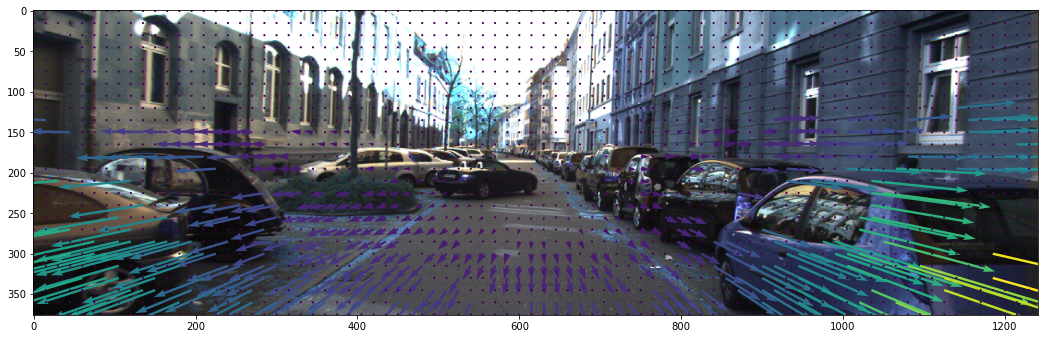

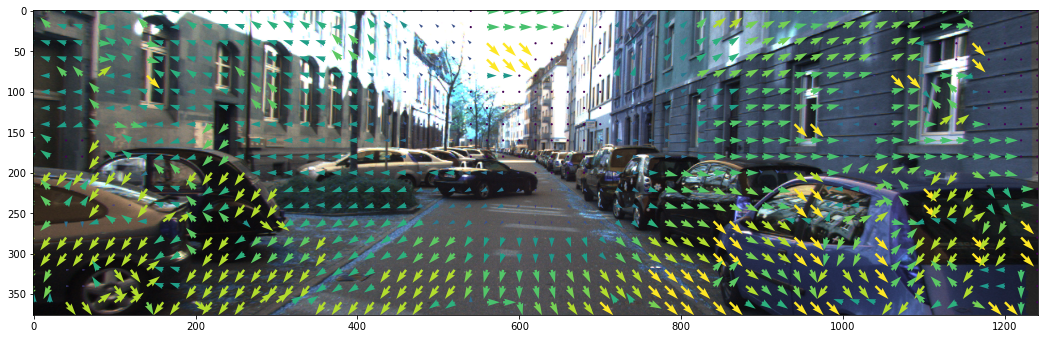

In [6]:
error_msne = flow_msen(gt_flow, optical_flow)
error_pepn = flow_pepn(gt_flow, optical_flow)
print('MSNE: ', error_msne, 'PEPN:', error_pepn)
plot_optical_flow_field(seq_path + '000045_11.png', gt_flow, 15, 0.25)
plot_optical_flow_field(seq_path + '000045_11.png', optical_flow, 20, 0.25)

In [8]:
from load_utils import *
gt_detect = readDetectionsXML('ai_challenge_s03_c010-full_annotation.xml')
gt_notParked = getNotParkedCars(gt_detect)

In [9]:
data_path = '../../AICity_data/train/S03/c010/'
vidcap = cv2.VideoCapture(data_path + 'vdo.avi')
ims = []

for frame in tqdm(range(600)):
    sucess, image = vidcap.read()
    if frame > 597:
        ims.append(image)

100%|██████████| 600/600 [00:08<00:00, 73.84it/s]


In [10]:
optical_flow2 = block_matching(ims[1], ims[0], 'backward', 'ssd', 32, 32, 2)

100%|██████████| 34/34 [03:37<00:00,  6.39s/it]


In [11]:
# plot optical flow
def plot_optical_flow_field2(img, flow, step=20, scale=0.1):
    plt.figure(figsize=(18,6))
    plt.imshow(img)

    h, w = flow[0].shape

    X = np.arange(0, w, step)
    Y = np.arange(0, h, step)
    U, V = np.meshgrid(X, Y)

    u_flow = flow[0][::step, ::step]
    v_flow = flow[1][::step, ::step]

    plt.quiver(U, V, u_flow, v_flow, np.hypot(u_flow, v_flow),scale_units='xy', angles='xy', scale=scale)
    plt.show()

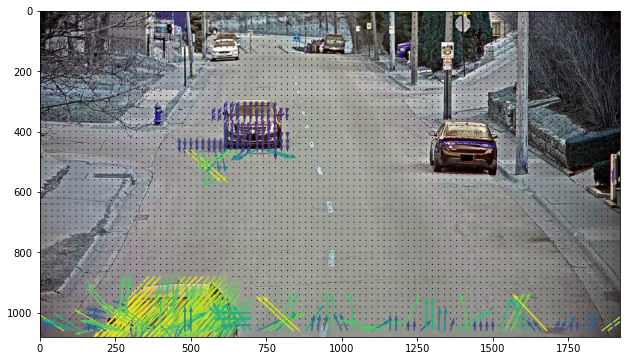

In [12]:
plot_optical_flow_field2(ims[1], optical_flow2, 20, 0.25)

In [20]:
def compute_block_of(block, box, im_target, mode, P, stride=1):
    blocH_size = block.shape[0]
    blocW_size = block.shape[1]                
    area_minx = max(0, int(box[0]) - P)
    area_miny = max(0, int(box[1]) - P)
    area_maxX = min(im_target.shape[1] - blocW_size, int(box[2]) + P)
    area_maxy = min(im_target.shape[0] - blocH_size, int(box[3]) + P)
    # area_target = target_img[area_miny:area_maxy, area_minx:area_maxX]
    minDist = inf
    of = []
    for y in tqdm(range(area_miny, area_maxy-blocH_size, stride)):
        for x in range(area_minx, area_maxX-blocW_size, stride):
            dist = distance(block, im_target[y:y+blocH_size, x:x+blocW_size], 'ssd')
            if dist < minDist:
                minDist = dist
                of = np.array([x - box[0], y - box[1]])
    if mode == 'forward':
        return -of
    return of
    

100%|██████████| 80/80 [00:02<00:00, 35.50it/s]


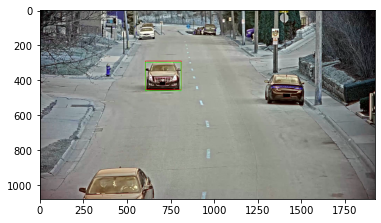

In [21]:
import copy
imgCopy = copy.deepcopy(ims[1])
P = 50
N = 32
box = (gt_notParked['598'][1].getBBox())
block = ims[0][int(box[1]):int(box[3]), int(box[0]):int(box[2])]
imgCopy = cv2.rectangle(imgCopy, (int(box[0]),int(box[1])), (int(box[2]),int(box[3])), (255,0,0), 2)
of = compute_block_of(block, box, ims[1], 'backward', 40)
imgCopy = cv2.rectangle(imgCopy, (int(box[0]+of[0]),int(box[1]+of[1])), (int(box[2]+of[0]),int(box[3]+of[1])), (0,255,0), 2)
plt.imshow(imgCopy)
plt.show()